# Make a prediction about the coal prediction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('../data/cleaned_coalpublic2010.csv', index_col='MSHA ID')
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Basin,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,,
103335,2010,Thompson South Mine,Alabama,Bibb,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"M&b Excavating Co., Inc., Llc","1001 Heflin Avenue West, Birmingham, AL 35214",NaN,103,1,30,4.634729
103381,2010,Tacoa Highwall Miner,Alabama,Bibb,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"Tacoa Minerals,llc","1669 Mission Hills Road, Alabaster, AL 35007",NaN,127564,13,33241,11.756373
103404,2010,Reid School Mine,Alabama,Blount,Appalachia Southern,Active,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","107 N. Walston Bridge Road, Jasper, AL 35504",NaN,148994,32,76025,11.911661
103117,2010,"Mine #2, #3, #4",Alabama,Cullman,Appalachia Southern,Temporarily closed,Surface,Operating Subsidiary,Mine only,"Evergreen Mining, Llc","74 Indutrial Parkway, Jasper, AL 35001",NaN,69035,17,34365,11.142369
100759,2010,North River #1 Underground Min,Alabama,Fayette,Appalachia Southern,Active,Underground,Operating Subsidiary,Mine and Preparation Plant,Chevron Mining Inc,"3114 County Road 63 S, Berry, AL 35546",United Mine Workers of America,3037170,372,816059,14.926437


In [3]:
len(df)

1285

In [4]:
for col in df.columns:
    print (col)

Year
Mine_Name
Mine_State
Mine_County
Mine_Basin
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


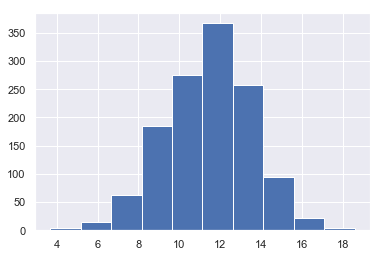

In [5]:
df.log_production.hist()

In [6]:
df.Mine_Status.unique()

array(['Active', 'Temporarily closed',
       'Active, men working, not producing', 'Permanently abandoned'],
      dtype=object)

In [9]:
df[['Mine_Status', 'log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.777410
"Active, men working, not producing",10.259398
Permanently abandoned,9.837603
Temporarily closed,9.304538


# Predict the production of coal mines

In [10]:
features = ['Average_Employees',
            'Labor_Hours'
           ]

categoricals = ['Mine_State',
                'Mine_County',
                'Mine_Status',
                'Mine_Type',
                'Company_Type',
                'Operation_Type',
                'Operating_Company',
                'Union_Code'
           ]

target = 'log_production'

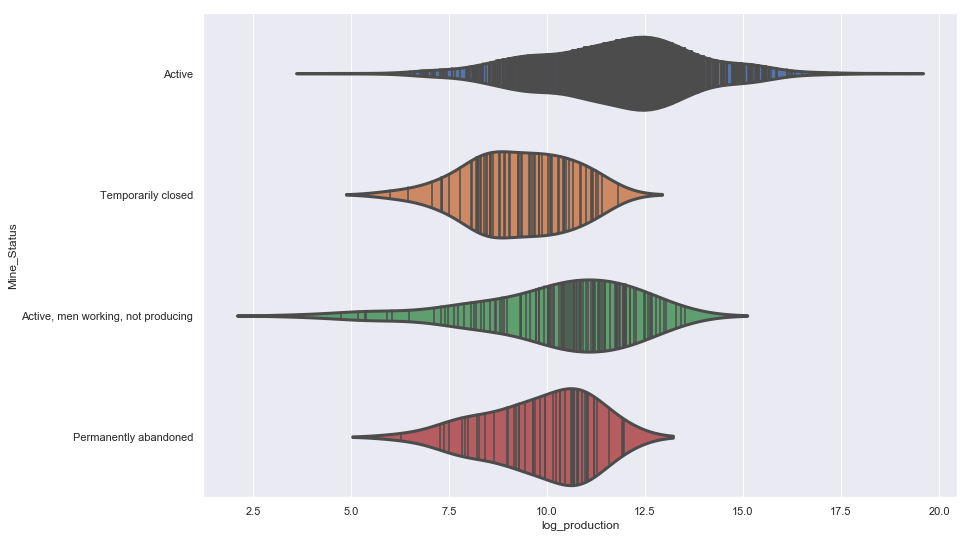

In [11]:
fig = plt.subplots(figsize=(14, 8))
sns.set_context('poster')

sns.violinplot(y='Mine_Status',
               x='log_production',
               data=df,
               split=True,
               inner='stick')
plt.tight_layout()

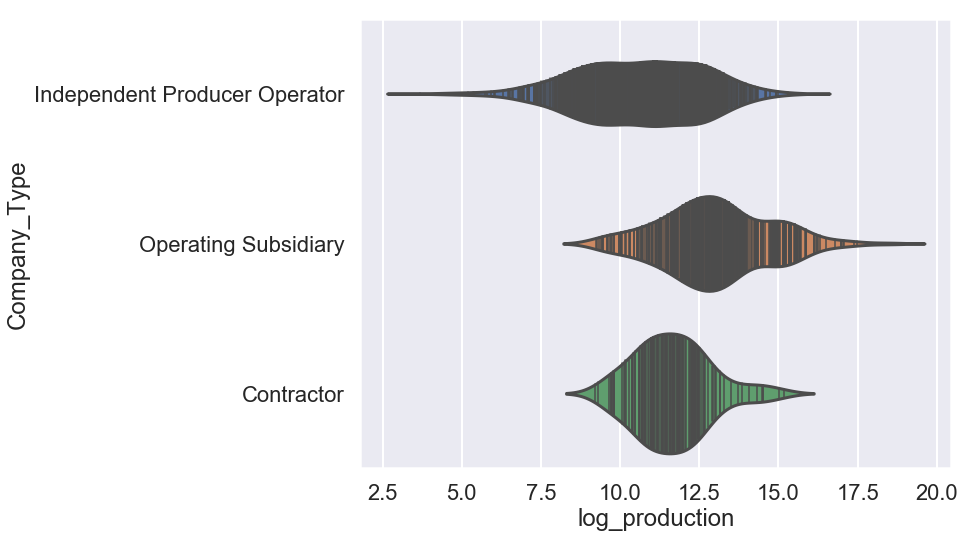

In [12]:
fig = plt.subplots(figsize=(14, 8))
sns.set_context('poster')

sns.violinplot(y='Company_Type',
               x='log_production',
               data=df,
               split=True,
               inner='stick')
plt.tight_layout()

In [13]:
pd.get_dummies(df[categoricals]).head()

,Mine_State_Alabama,Mine_State_Alaska,Mine_State_Arizona,Mine_State_Arkansas,Mine_State_Colorado,Mine_State_Illinois,Mine_State_Indiana,Mine_State_Kansas,Mine_State_Kentucky (East),Mine_State_Kentucky (West),...,"Operating_Company_Yellow Rose Coal, Llc","Operating_Company_Yeshic, Llc","Operating_Company_Young Mining, Llc",Union_Code_AFCI,Union_Code_International Brotherhood of Electrical Workers,Union_Code_International Union of Operation Engineers,Union_Code_Scotia Employees Association,Union_Code_Teamsters,Union_Code_United Mine Workers of America,Union_Code_Western Energy Workers
MSHA ID,,,,,,,,,,,,,,,,,,,,,
103335,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103381,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103404,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103117,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
dummy_categoricals = []
for categorical in categoricals:
    print (categorical, len(df[categorical].unique()))
    drop_var =sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix = categorical)
    df = pd.concat([df,temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 169
Mine_Status 4
Mine_Type 3
Company_Type 3
Operation_Type 3
Operating_Company 854
Union_Code 8


TypeError: '<' not supported between instances of 'str' and 'float'

In [15]:
dummy_categoricals[:10]

['Mine_State_Alabama',
 'Mine_State_Alaska',
 'Mine_State_Arizona',
 'Mine_State_Arkansas',
 'Mine_State_Colorado',
 'Mine_State_Illinois',
 'Mine_State_Indiana',
 'Mine_State_Kansas',
 'Mine_State_Kentucky (East)',
 'Mine_State_Kentucky (West)']

# Build our model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
len(dummy_categoricals)

1058

In [18]:
train, test = train_test_split(df, test_size=0.3)

In [19]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

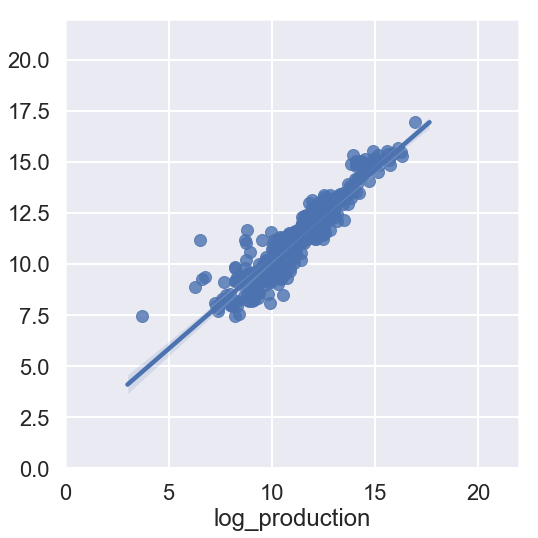

In [20]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features + dummy_categoricals]))
plt.xlim(0,22)
plt.ylim(0,22)
plt.tight_layout()

In [21]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [22]:
predicted = rf.predict(test[features + dummy_categoricals])
r2_score(test[target], predicted)

0.866673621500531

In [23]:
explained_variance_score(test[target], predicted)

0.8674318753160501

In [24]:
mean_squared_error(test[target], predicted)

0.5373527099701577

In [26]:
rf_importances = pd.DataFrame({
    'name': train[features + dummy_categoricals].columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

rf_importances.head(20)

,name,importance
0,Labor_Hours,0.782168
1,Average_Employees,0.100436
2,Mine_County_Campbell,0.009889
3,Mine_Type_Surface,0.007389
4,Company_Type_Independent Producer Operator,0.003746
5,"Operating_Company_Resources Limited, Llc",0.002745
6,Mine_State_Refuse Recovery,0.002719
7,Operating_Company_Consol Of Kentucky Inc,0.002641
8,Mine_County_Mingo,0.002248
9,"Mine_Status_Active, men working, not producing",0.002247
